## 1) Image Resizing using OpenCV | Python


    In digital image processing, a process which transforms a discrete image defined at one
    set of coordinate locations to a new set of coordinate points is termed as resampling.
    
    The process of resampling uses the interpolation functions to find the value(s)
    of pixel(s) at new coordinates
**Image resizing refers to the scaling of images :-**

- It helps in reducing the number of pixels from an image and that has several advantages.
- It can reduce the time of training of a neural network as more is the number of pixels in an image more is the number of input nodes that in turn increases the complexity of the model.
- It also helps in zooming in images.

**Choice of Interpolation Method for Resizing :–**

- `cv2.INTER_AREA`:- resampling using pixel area relation. This is used when we need need to shrink (decimate)an image, as it gives moire’-free results. But when the image is zoomed, it is similar to the `INTER_NEAREST method`.


- `cv2.INTER_CUBIC`:- a bicubic interpolation over 4×4 pixel neighborhood.This is slow but more efficient.


- `cv2.INTER_LINEAR`:- This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.


- `INTER_NEAREST` :– a nearest-neighbor interpolation which has a rectangular shape in space domain.


- `INTER_LANCZOS4` :– a Lanczos interpolation over 8×8 pixel neighborhood

If you are enlarging the image, you should prefer to use `INTER_LINEAR` or `INTER_CUBIC` interpolation. If you are shrinking the image, you should prefer to use `INTER_AREA` interpolation.

>Note: One thing to keep in mind while using the cv2.resize() function is that the tuple passed for determining the size of new image ((1050, 1610) in this case) follows the order (width, height) unlike as expected (height, width).


---
**Resources**
- [https://chadrick-kwag.net/cv2-resize-interpolation-methods/](https://chadrick-kwag.net/cv2-resize-interpolation-methods/)
- [https://shodhganga.inflibnet.ac.in/bitstream/10603/121236/9/09_chapter2.pdf](https://shodhganga.inflibnet.ac.in/bitstream/10603/121236/9/09_chapter2.pdf)

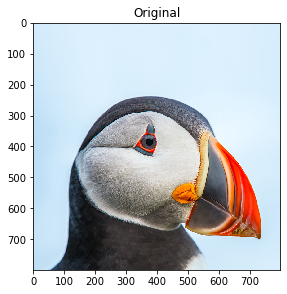

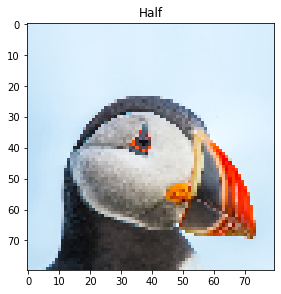

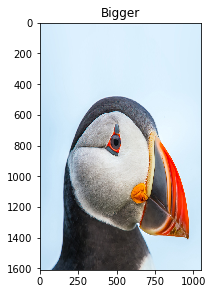

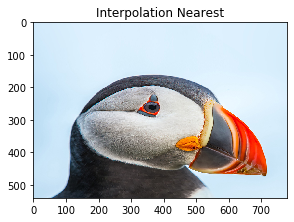

In [41]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  

# Loading the image     
image = cv2.imread("puffin.jpg", 1) 

half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1) 

bigger = cv2.resize(image, (1050, 1610))   

stretch_near = cv2.resize(image, (780, 540),  interpolation = cv2.INTER_NEAREST) 
  
  
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"] 
images =[image, half, bigger, stretch_near] 
count = 4
  

for i in range(count): 
    plt.figure(figsize=(10,10))
    plt.subplot(2, 2, i + 1) 
    plt.title(Titles[i]) 
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))


## 2) Image Processing in Python (Scaling, Rotating, Shifting and Edge Detection)

### Scaling an Image :-

###### Scaling operation increases/reduces size of an image.

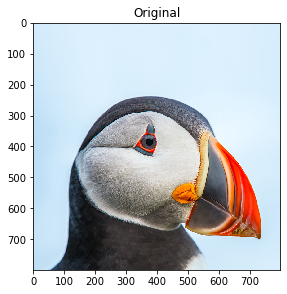

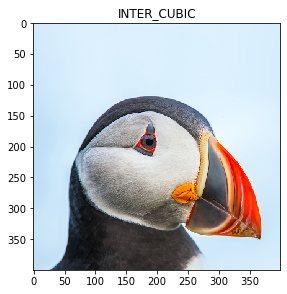

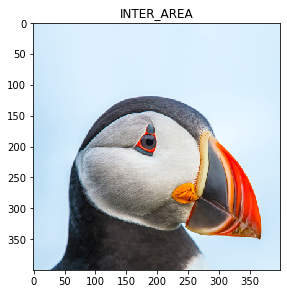

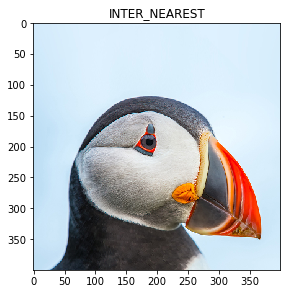

In [42]:
import cv2 
import numpy as np 

# Read image from disk. 
img = cv2.imread('puffin.jpg') 

# Get number of pixel horizontally and vertically. 
h, w, c = img.shape

# Specify the size of image along with interploation methods. 
# cv2.INTER_CUBIC is used for zooming. 
res = cv2.resize(img, (int(w / 2), int(h / 2)), interpolation = cv2.INTER_CUBIC) 

# cv2.INTER_AREA is used for shrinking. 
res2 = cv2.resize(img, (int(w / 2), int(h / 2)), interpolation = cv2.INTER_AREA) 

# cv2.INTER_NEAREST is used for stretch near.
res3 = cv2.resize(img, (int(w / 2), int(h / 2)), interpolation = cv2.INTER_NEAREST) 


Titles =["Original", "INTER_CUBIC", "INTER_AREA", "INTER_NEAREST"] 
images =[img, res, res2, res3] 
count = 4
  
for i in range(count): 
    plt.figure(figsize=(10,10))
    plt.subplot(2, 2, i + 1) 
    plt.title(Titles[i]) 
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))


### Rotating an image :-
###### Images can be rotated to any degree clockwise or otherwise. We just need to define rotation matrix listing rotation point, degree of rotation and the scaling factor.

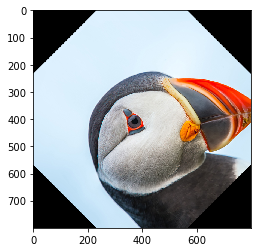

In [43]:
import cv2 
import numpy as np 
  
FILE_NAME = 'puffin.jpg'
try: 
    # Read image from the disk. 
    img = cv2.imread(FILE_NAME) 
  
    # Shape of image in terms of pixels. 
    (rows, cols) = img.shape[:2] 
  
    # getRotationMatrix2D creates a matrix needed for transformation. 
    # We want matrix for rotation w.r.t center to 45 degree without scaling. 
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1) 
    res = cv2.warpAffine(img, M, (cols, rows)) 
  
    # Write image back to disk. 
    cv2.imwrite('Result-images/rotate.jpg', res) 


except IOError: 
    print ('Error while reading files !!!')  

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

### Translating an Image :-
**Translating an image means shifting it within a given frame of reference.**

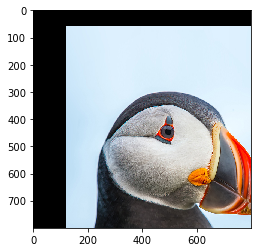

In [44]:
import cv2 
import numpy as np 
  
# Create translation matrix. 
# If the shift is (x, y) then matrix would be 
# M = [1 0 x] 
#     [0 1 y] 
# Let's shift by (120, 60). 


M = np.float32([[1, 0, 120], [0, 1, 60]]) 
  
try: 
  
    # Read image from disk. 
    img = cv2.imread('puffin.jpg') 
    (rows, cols) = img.shape[:2] 
  
    # warpAffine does appropriate shifting given the 
    # translation matrix. 
    res = cv2.warpAffine(img, M, (cols, rows)) 
    
    # Write image back to disk. 
    cv2.imwrite('Result-images/transfrom.jpg', res) 


except IOError: 
    print ('Error while reading files !!!') 

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

### Edge detection in an Image :-


**The process of image detection involves detecting sharp edges in the image. This edge detection is essential in context of image recognition or object localization/detection. There are several algorithms for detecting edges due to it’s wide applicability. We’ll be using one such algorithm known as Canny Edge Detection**

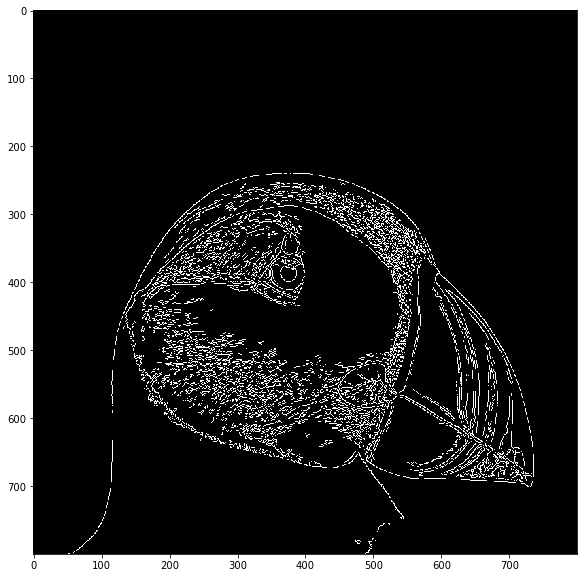

In [45]:
import cv2 
import numpy as np 
  
try: 
    # Read image from disk. 
    img = cv2.imread('puffin.jpg') 
  
    # Canny edge detection. 
    edges = cv2.Canny(img, 100, 200) 
  
    # Write image back to disk. 
    cv2.imwrite('Result-images/edges.jpg', edges) 
except IOError: 
    print ('Error while reading files !!!') 
    

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

## 3) Python | Image blurring using OpenCV

**Image Blurring** refers to making the image less clear or distinct. It is done with the help of various low pass filter kernels.

- **Advantages of blurring:**

    - It helps in Noise removal. As noise is considered as high pass signal so by the application of low pass filter kernel we restrict noise.
    - It helps in smoothing the image.
    - Low intensity edges are removed.
    - It helps in hiding the details when necessary. For e.g. in many cases police deliberately want to hide the face of the victim, in such cases blurring is required.


- **Important types of blurring:**
     - **1) Gaussian Blurring:** Gaussian blur is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. It is also used as a preprocessing stage before applying our machine learning or deep learning models. ***E.g. of a Gaussian kernel(3×3)***  <img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-0e80b99ad85fefbbc12134e069537987_l3.svg">

     - **2) Median Blur:** The Median Filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Median filtering is very widely used in digital image processing because, under certain conditions, it preserves edges while removing noise. It is one of the best algorithms to remove Salt and pepper noise.

     - **3) Bilateral Blur:** A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. This weight can be based on a Gaussian distribution. Thus, sharp edges are preserved while discarding the weak ones.
     
**Additional resources :-**

- [https://www.geeksforgeeks.org/what-is-image-blurring/?ref=rp](https://www.geeksforgeeks.org/what-is-image-blurring/?ref=rp)
- [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html)

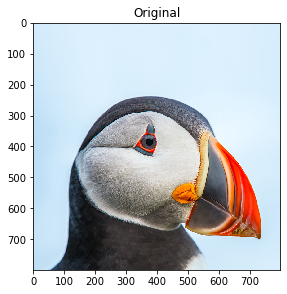

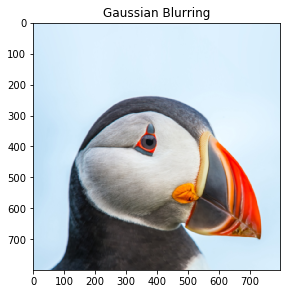

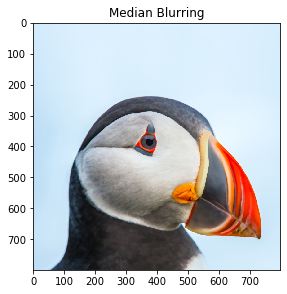

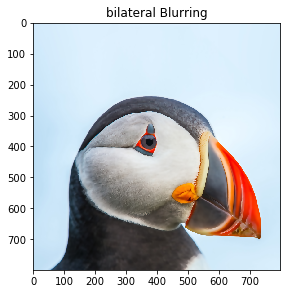

In [55]:
# importing libraries 
import cv2 
import numpy as np 
  
image = cv2.imread('puffin.jpg') 
Gaussian = cv2.GaussianBlur(image, (7, 7), 0)
median = cv2.medianBlur(image, 5) 
bilateral = cv2.bilateralFilter(image, 9, 75, 75) 


Titles =["Original", "Gaussian Blurring", "Median Blurring", "bilateral Blurring"] 
images =[image, Gaussian, median, bilateral] 
count = 4
  
for i in range(count): 
    plt.figure(figsize=(10,10))
    plt.subplot(2, 2, i + 1) 
    plt.title(Titles[i]) 
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
